Anna Wieteska     234013


Izabela Pięczek   233994

 # Zadanie 1 

In [97]:
#Import bibliotek

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [99]:
#Wczytanie pliku leaf.csv

df = pd.read_csv('leaf.csv', header=None)

#Przypisanie do zmiennej 'data' cech dwóch klas liści (“Populus nigra” - klasa nr 3, “Quercus robur” - klasa nr 5)

data = df[(df[0]==3)|(df[0]==5)]

#Wyświetlenie danych

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
22,3,1,0.70273,1.2099,0.36317,0.92110,0.98772,0.60555,0.023597,0.101340,0.089301,0.200880,0.038786,0.015895,0.000405,1.53710
23,3,2,0.66307,1.2065,0.32559,0.94952,0.99649,0.75954,0.013388,0.032621,0.021815,0.097143,0.009348,0.004028,0.000036,0.53410
24,3,3,0.61289,1.0991,0.33117,0.92405,0.98421,0.61661,0.025545,0.118770,0.054687,0.160600,0.025145,0.011672,0.000121,1.10760
25,3,4,0.70668,1.2510,0.38111,0.94226,0.99825,0.69250,0.019432,0.068724,0.031587,0.115020,0.013056,0.005311,0.000086,0.72247
26,3,5,0.66889,1.1435,0.38460,0.90355,0.99649,0.60571,0.028329,0.146060,0.057506,0.159310,0.024752,0.010304,0.000185,1.13650
27,3,6,0.50139,1.0066,0.29593,0.91585,0.99825,0.64029,0.021782,0.086347,0.054635,0.159800,0.024899,0.011106,0.000162,1.05110
28,3,7,0.60803,1.0646,0.34460,0.90487,0.99649,0.67517,0.031915,0.185380,0.062450,0.164110,0.026225,0.010602,0.000230,1.23070
29,3,8,0.56599,1.0427,0.35318,0.89086,0.99825,0.62068,0.032971,0.197850,0.026348,0.105890,0.011088,0.004651,0.000052,0.62671
30,3,9,0.68605,1.1632,0.37528,0.91639,0.99825,0.61136,0.030339,0.167530,0.058401,0.168580,0.027633,0.012886,0.000155,1.08150
31,3,10,0.59571,1.0840,0.32592,0.92056,0.99825,0.65698,0.024753,0.111510,0.042051,0.147220,0.021213,0.010881,0.000065,0.83221


In [100]:
#Przypisanie zmiennej x cech (7 i 8), którymi różnią się klasy liści
#Przypisanie zmiennej x1 klasy liścia

x = data.iloc[:, 7:9] 
x1 = data.iloc[:,0:1]

In [101]:
#Do zmiennych xx i xx11 przypisuje liczbową reprezentacje DataFrame (x i x1)
#xx1 zwraca kopię tablicy xx11 zwiniętą do jednego wymiaru

xx = x.values
xx11 = x1.values
xx1 = xx11.flatten()

   ## Normalizacja danych

In [102]:
#Normalizacja typu min-max - przeskalowanie rzeczywistych atrybutów liczbowych do zakresu 0 i 1
#Wyświetlenie wartości znormalizowanych

xx_normalized=(xx-np.tile(np.min(xx,axis=0), (22,1))) / (np.tile(np.max(xx,axis=0)-np.min(xx,axis=0), (22,1)))

xx_normalized

array([[0.6571524 , 0.1520305 ],
       [1.        , 0.        ],
       [0.68177669, 0.18103975],
       [0.85074029, 0.09000611],
       [0.65750863, 0.22249855],
       [0.7344985 , 0.12500186],
       [0.8121563 , 0.27590058],
       [0.69083825, 0.29162633],
       [0.67008794, 0.25243109],
       [0.77165758, 0.16924543],
       [0.14803518, 0.4493604 ],
       [0.23404208, 0.40496791],
       [0.0453746 , 0.50054355],
       [0.05343426, 1.        ],
       [0.10194812, 0.36669595],
       [0.        , 0.50451966],
       [0.09526884, 0.54454885],
       [0.1328732 , 0.38553409],
       [0.07380608, 0.57166684],
       [0.02669487, 0.5570133 ],
       [0.02264277, 0.52739349],
       [0.00590003, 0.6357463 ]])

In [103]:
#Podzielenie zbioru na zbiór treningowy i testowy (testowy - 70% próbek)

train_set, test_set ,train_labels, test_labels = train_test_split(xx_normalized,xx1, test_size=0.70, random_state = 150) 

In [104]:
#Sprawdzenie wielkości zbioru testowego i treningowego

print("Zbior testowy:", len(test_set), "elemetntow")
print("Zbior treningowy: ", len(train_set), "elemetntow")

Zbior testowy: 16 elemetntow
Zbior treningowy:  6 elemetntow


## Klasyfikator NN - opracowany na poprzednim laboratorium

In [105]:
def NN_clasifier():
    a = []
    for i in range(16):
        distances_vec = np.sum((np.tile(test_set[i],(np.shape(train_set)[0],1)) - train_set)**2, axis=1)
        sorted_indices = np.argsort( distances_vec )[:1].astype(int)                              
        nearest_neighbours = np.array(train_labels)[sorted_indices]
        t =nearest_neighbours.flatten()
        predict = max(set(t), key=list(t).count)
        a.append(predict)
    return a

In [106]:
NN_predicted_groups = NN_clasifier()

In [107]:
test_labels[test_labels!=3]=0                            #zmiana wszystkich etykiet innych niż 3 na 0
NN_predicted_groups = np.asarray(NN_predicted_groups)
NN_predicted_groups[NN_predicted_groups!=3]=0

## Klasyfikator kNN - rozszerzenie funkcjonalności powyższego algorytmu

In [108]:
def clasiferKNN(kn):
    predicted1=[]
    for i in range(16):
        k = kn
        distances_vec = np.sum((np.tile(test_set[i],(np.shape(train_set)[0],1)) - train_set)**2, axis=1)
        sorted_indices = np.argsort( distances_vec )[:k].astype(int)                              
        nearest_neighbours = np.array(train_labels)[sorted_indices]

        #poniżej to samo w jednej linii
        #nearest_neighbours = np.array(training_labels)[np.argsort(np.sum((np.tile(test_vec[tested_case],
        #(np.shape(training_vec)[0],1)) - training_vec)**2, axis=1))[:k].astype(int)]
        #print(nearest_neighbours)

        d =max(set(nearest_neighbours), key=list(nearest_neighbours).count)
        predicted1.append(d)
    return predicted1

## Klasyfikator kNN o N=3

In [109]:
kNN_3_predicted_groups = clasiferKNN(3)
kNN_3_predicted_groups = np.asarray(kNN_3_predicted_groups)
kNN_3_predicted_groups[kNN_3_predicted_groups!=3]=0

## Klasyfikator kNN o N=5

In [110]:
kNN_5_predicted_groups = clasiferKNN(5)
kNN_5_predicted_groups = np.asarray(kNN_5_predicted_groups)
kNN_5_predicted_groups[kNN_5_predicted_groups!=3]=0

# Porównianie klasyfikatorów

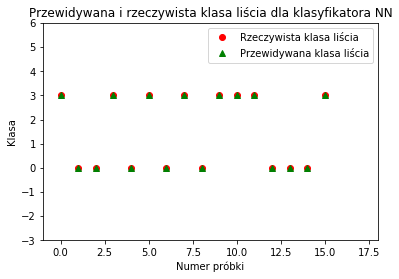

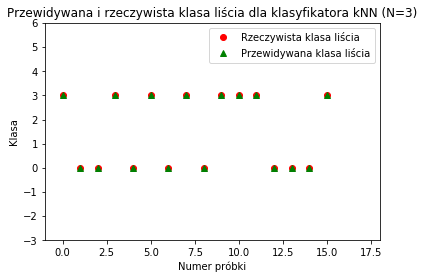

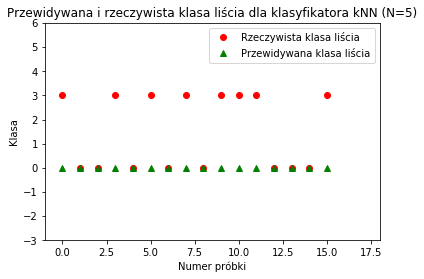

In [111]:
            #Wyświetlenie rzeczywistej klasy liścia i przewidywanej dla klasyfikatorów   
    
    #Klasyfikator NN
plt.plot(test_labels, 'ro', label='Rzeczywista klasa liścia')
plt.plot(NN_predicted_groups, 'g^', label='Przewidywana klasa liścia')
plt.title("Przewidywana i rzeczywista klasa liścia dla klasyfikatora NN")
plt.xlabel("Numer próbki")
plt.ylabel("Klasa")
plt.legend()
plt.axis([-1, 18, -3, 6])
plt.show()

    #Klasyfikator kNN (N=3)
plt.plot(test_labels, 'ro', label='Rzeczywista klasa liścia')
plt.plot(kNN_3_predicted_groups, 'g^', label='Przewidywana klasa liścia')
plt.title("Przewidywana i rzeczywista klasa liścia dla klasyfikatora kNN (N=3)")
plt.xlabel("Numer próbki")
plt.ylabel("Klasa")
plt.legend()
plt.axis([-1, 18, -3, 6])
plt.show()
 
    #Klasyfikator kNN (N=5)
plt.plot(test_labels, 'ro', label='Rzeczywista klasa liścia')
plt.plot(kNN_5_predicted_groups, 'g^', label='Przewidywana klasa liścia')
plt.title("Przewidywana i rzeczywista klasa liścia dla klasyfikatora kNN (N=5)")
plt.xlabel("Numer próbki")
plt.ylabel("Klasa")
plt.legend()
plt.axis([-1, 18, -3, 6])
plt.show()


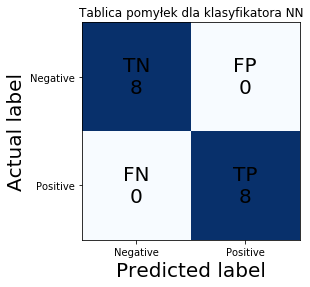

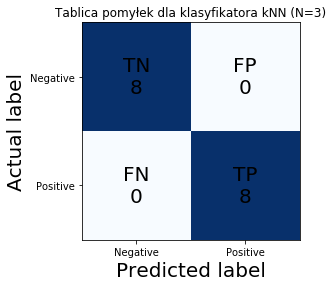

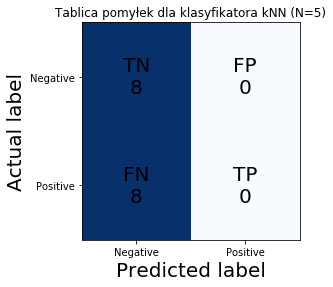

In [112]:
                                #Wyświetlenie tablicy pomyłek (confusion matrix)

    #Klasyfikator NN 
plt.figure(1)
cm1=confusion_matrix(test_labels, NN_predicted_groups)
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Tablica pomyłek dla klasyfikatora NN")
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("Actual label", fontsize=20)
plt.xticks([0,1], ('Negative', 'Positive'))
plt.yticks([0,1], ('Negative', 'Positive'))
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm1[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')
       
    #Klasyfikator kNN (N=3)
plt.figure(2)
cm2=confusion_matrix(test_labels, kNN_3_predicted_groups)
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Tablica pomyłek dla klasyfikatora kNN (N=3)")
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("Actual label", fontsize=20)
plt.xticks([0,1], ('Negative', 'Positive'))
plt.yticks([0,1], ('Negative', 'Positive'))
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm2[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')
        
    #Klasyfikator kNN (N=5)
plt.figure(3)
cm3=confusion_matrix(test_labels, kNN_5_predicted_groups)
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Tablica pomyłek dla klasyfikatora kNN (N=5)")
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("Actual label", fontsize=20)
plt.xticks([0,1], ('Negative', 'Positive'))
plt.yticks([0,1], ('Negative', 'Positive'))
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm3[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')

In [113]:
# Porównnie dokładności klasyfikatorów

print("Dokładność klasyfikatora NN wynosi:",accuracy_score(test_labels, NN_predicted_groups, normalize=True))
print("Dokładność klasyfikatora kNN (N=3) wynosi:",accuracy_score(test_labels, kNN_3_predicted_groups, normalize=True))
print("Dokładność klasyfikatora kNN (N=5) wynosi:",accuracy_score(test_labels, kNN_5_predicted_groups, normalize=True))
print('\n')
print("Czułość klasyfikatora NN wynosi:",cm1[0,0]/(cm1[0,0]+cm1[0,1]))
print("Czułość klasyfikatora kNN (N=3) wynosi:",cm2[0,0]/(cm2[0,0]+cm2[0,1]))
print("Czułość klasyfikatora kNN (N=5) wynosi:",cm3[0,0]/(cm3[0,0]+cm3[0,1]))

Dokładność klasyfikatora NN wynosi: 1.0
Dokładność klasyfikatora kNN (N=3) wynosi: 1.0
Dokładność klasyfikatora kNN (N=5) wynosi: 0.5


Czułość klasyfikatora NN wynosi: 1.0
Czułość klasyfikatora kNN (N=3) wynosi: 1.0
Czułość klasyfikatora kNN (N=5) wynosi: 1.0


## WNIOSKI

Dokładność klasyfikatorów NN oraz kNN (N=3) wynosi 100%, natomiast dokładność klasyfikatora kNN (N=5) --> 50%. 
W tym przypadku, im większa ilość "sąsiadów", tym mniejsza dokładność klasyfikatora.
Czułość natomiast we wszystkich przykładach jest taka sama.

# Dodanie do zbioru więcej cech

In [114]:
#Cechy z przedzialu 2-9

x = data.iloc[:, 2:9] 
x1 = data.iloc[:,0:1]

In [115]:
xx = x.values
xx11 = x1.values
xx1 = xx11.flatten()

In [116]:
#Normalizacja danych

xx_normalized=(xx-np.tile(np.min(xx,axis=0), (22,1))) / (np.tile(np.max(xx,axis=0)-np.min(xx,axis=0), (22,1)))

In [117]:
#Podzielenie zbioru na zbiór treningowy i testowy (testowy - 70% próbek)

train_set_2, test_set_2 ,train_labels_2, test_labels_2 = train_test_split(xx_normalized,xx1, test_size=0.70, random_state = 150)

In [118]:
#Sprawdzenie wielkości zbioru testowego i treningowego

print("Zbior testowy:", len(test_set_2), "elemetntow")
print("Zbior treningowy: ", len(train_set_2), "elemetntow")

Zbior testowy: 16 elemetntow
Zbior treningowy:  6 elemetntow


### Klasyfikator NN

In [119]:
def NN_clasifier_2():
    a = []
    for i in range(16):
        distances_vec = np.sum((np.tile(test_set_2[i],(np.shape(train_set_2)[0],1)) - train_set_2)**2, axis=1)
        sorted_indices = np.argsort( distances_vec )[:1].astype(int)                              
        nearest_neighbours = np.array(train_labels_2)[sorted_indices]
        t =nearest_neighbours.flatten()
        predict = max(set(t), key=list(t).count)
        a.append(predict)
    return a

In [120]:
test_labels_2[test_labels_2!=3]=0
NN_pred_groups = NN_clasifier_2()
NN_pred_groups = np.asarray(NN_pred_groups)
NN_pred_groups[NN_pred_groups!=3]=0

### Klasyfikator kNN (N=3)

In [121]:
def clasiferKNN_2(kn):
    predicted1=[]
    for i in range(16):
        k = kn
        distances_vec = np.sum((np.tile(test_set_2[i],(np.shape(train_set_2)[0],1)) - train_set_2)**2, axis=1)
        sorted_indices = np.argsort( distances_vec )[:k].astype(int)                              
        nearest_neighbours = np.array(train_labels_2)[sorted_indices]
        d =max(set(nearest_neighbours), key=list(nearest_neighbours).count)
        predicted1.append(d)
    return predicted1

In [122]:
kNN_3_pred_groups = clasiferKNN_2(3)
kNN_3_pred_groups = np.asarray(kNN_3_pred_groups)
kNN_3_pred_groups[kNN_3_pred_groups!=3]=0

### Klasyfikator kNN (N=5)

In [123]:
kNN_5_pred_groups = clasiferKNN_2(5)
kNN_5_pred_groups = np.asarray(kNN_5_pred_groups)
kNN_5_pred_groups[kNN_5_pred_groups!=3]=0

### Porównianie klasyfikatorów

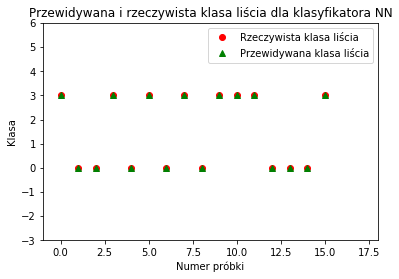

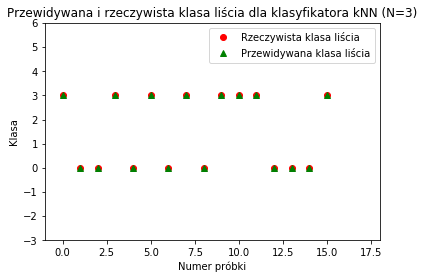

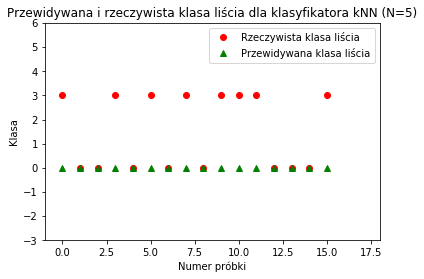

In [124]:
            #Wyświetlenie rzeczywistej klasy liścia i przewidywanej dla klasyfikatorów   
    
    #Klasyfikator NN
plt.plot(test_labels_2, 'ro', label='Rzeczywista klasa liścia')
plt.plot(NN_pred_groups, 'g^', label='Przewidywana klasa liścia')
plt.title("Przewidywana i rzeczywista klasa liścia dla klasyfikatora NN")
plt.xlabel("Numer próbki")
plt.ylabel("Klasa")
plt.legend()
plt.axis([-1, 18, -3, 6])
plt.show()

    #Klasyfikator kNN (N=3)
plt.plot(test_labels_2, 'ro', label='Rzeczywista klasa liścia')
plt.plot(kNN_3_pred_groups, 'g^', label='Przewidywana klasa liścia')
plt.title("Przewidywana i rzeczywista klasa liścia dla klasyfikatora kNN (N=3)")
plt.xlabel("Numer próbki")
plt.ylabel("Klasa")
plt.legend()
plt.axis([-1, 18, -3, 6])
plt.show()
 
    #Klasyfikator kNN (N=5)
plt.plot(test_labels_2, 'ro', label='Rzeczywista klasa liścia')
plt.plot(kNN_5_pred_groups, 'g^', label='Przewidywana klasa liścia')
plt.title("Przewidywana i rzeczywista klasa liścia dla klasyfikatora kNN (N=5)")
plt.xlabel("Numer próbki")
plt.ylabel("Klasa")
plt.legend()
plt.axis([-1, 18, -3, 6])
plt.show()


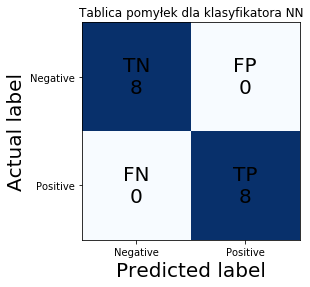

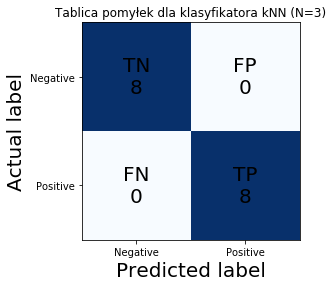

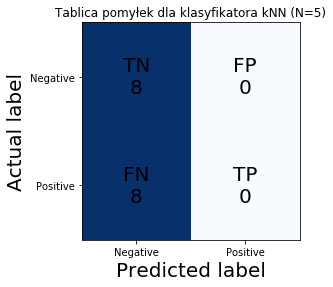

In [126]:
                                #Wyświetlenie tablicy pomyłek (confusion matrix)

    #Klasyfikator NN 
plt.figure()
cm1=confusion_matrix(test_labels_2, NN_pred_groups)
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Tablica pomyłek dla klasyfikatora NN")
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("Actual label", fontsize=20)
plt.xticks([0,1], ('Negative', 'Positive'))
plt.yticks([0,1], ('Negative', 'Positive'))
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm1[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')
       
    #Klasyfikator kNN (N=3)
plt.figure()
cm2=confusion_matrix(test_labels_2, kNN_3_pred_groups)
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Tablica pomyłek dla klasyfikatora kNN (N=3)")
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("Actual label", fontsize=20)
plt.xticks([0,1], ('Negative', 'Positive'))
plt.yticks([0,1], ('Negative', 'Positive'))
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm2[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')
        
    #Klasyfikator kNN (N=5)
plt.figure()
cm3=confusion_matrix(test_labels_2, kNN_5_pred_groups)
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Tablica pomyłek dla klasyfikatora kNN (N=5)")
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("Actual label", fontsize=20)
plt.xticks([0,1], ('Negative', 'Positive'))
plt.yticks([0,1], ('Negative', 'Positive'))
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm3[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')

In [127]:
# Porównnie dokładności klasyfikatorów

print("Dokładność klasyfikatora NN wynosi:",accuracy_score(test_labels_2, NN_pred_groups, normalize=True))
print("Dokładność klasyfikatora kNN (N=3) wynosi:",accuracy_score(test_labels_2, kNN_3_pred_groups, normalize=True))
print("Dokładność klasyfikatora kNN (N=5) wynosi:",accuracy_score(test_labels_2, kNN_5_pred_groups, normalize=True))
print('\n')
print("Czułość klasyfikatora NN wynosi:",cm1[0,0]/(cm1[0,0]+cm1[0,1]))
print("Czułość klasyfikatora kNN (N=3) wynosi:",cm2[0,0]/(cm2[0,0]+cm2[0,1]))
print("Czułość klasyfikatora kNN (N=5) wynosi:",cm3[0,0]/(cm3[0,0]+cm3[0,1]))

Dokładność klasyfikatora NN wynosi: 1.0
Dokładność klasyfikatora kNN (N=3) wynosi: 1.0
Dokładność klasyfikatora kNN (N=5) wynosi: 0.5


Czułość klasyfikatora NN wynosi: 1.0
Czułość klasyfikatora kNN (N=3) wynosi: 1.0
Czułość klasyfikatora kNN (N=5) wynosi: 1.0


## WNIOSKI

Po dodaniu większej ilości cech, otrzymujemy taki sam wynik jak w przypadku gdy bierzemy pod uwagę tylko 2 cechy. Dokładność klasyfikatorów NN oraz kNN (N=3) wynosi 100%, natomiast dokładność klasyfikatora kNN (N=5) --> 50%. A czułość we wszystkich przypadkach jest jednakowa.

## Dodanie do zbioru więcej klas liści

In [128]:
#Dodajemy 5 klas

data2=df[(df[0]==1)|(df[0]==2)|(df[0]==3)|(df[0]==4)|(df[0]==5)]

In [129]:
x = data2.iloc[:, 2:9] 
x1 = data2.iloc[:,0:1]

In [130]:
xx=x.values
xx11= x1.values
xx1 = xx11.flatten()

In [131]:
#Normalizacja danych

xx_normalized=(xx-np.tile(np.min(xx,axis=0), (52,1))) / (np.tile(np.max(xx,axis=0)-np.min(xx,axis=0), (52,1)))

In [132]:
#Podzielenie zbioru na zbiór treningowy i testowy (testowy - 70% próbek)

train_set_3, test_set_3 ,train_labels_3, test_labels_3 = train_test_split(xx_normalized,xx1, test_size=0.70, random_state = 150)

In [133]:
#Sprawdzenie wielkości zbioru testowego i treningowego

print("Zbior testowy:", len(test_set_3), "elemetntow")
print("Zbior treningowy: ", len(train_set_3), "elemetntow")

Zbior testowy: 37 elemetntow
Zbior treningowy:  15 elemetntow


### Klasyfikator NN

In [134]:
def NN_clasifier_3():
    a = []
    for i in range(37):
        distances_vec = np.sum((np.tile(test_set_3[i],(np.shape(train_set_3)[0],1)) - train_set_3)**2, axis=1)
        sorted_indices = np.argsort( distances_vec )[:1].astype(int)                              
        nearest_neighbours = np.array(train_labels_3)[sorted_indices]
        t =nearest_neighbours.flatten()
        predict = max(set(t), key=list(t).count)
        a.append(predict)
    return a

In [135]:
test_labels_3[test_labels_3!=3]=0
NN_predic_groups = NN_clasifier_3()
NN_predic_groups = np.asarray(NN_predic_groups)
NN_predic_groups[NN_predic_groups!=3]=0

### Klasyfikator kNN (N=3)

In [136]:
def clasiferKNN_3(kn):
    predicted1=[]
    for i in range(37):
        k = kn
        distances_vec = np.sum((np.tile(test_set_3[i],(np.shape(train_set_3)[0],1)) - train_set_3)**2, axis=1)
        sorted_indices = np.argsort( distances_vec )[:k].astype(int)                              
        nearest_neighbours = np.array(train_labels_3)[sorted_indices]
        d =max(set(nearest_neighbours), key=list(nearest_neighbours).count)
        predicted1.append(d)
    return predicted1

In [137]:
kNN_3_predic_groups = clasiferKNN_3(3)
kNN_3_predic_groups = np.asarray(kNN_3_predic_groups)
kNN_3_predic_groups[kNN_3_predic_groups!=3]=0

### Klasyfikator kNN (N=5)

In [138]:
kNN_5_predic_groups = clasiferKNN_3(5)
kNN_5_predic_groups = np.asarray(kNN_5_predic_groups)
kNN_5_predic_groups[kNN_5_predic_groups!=3]=0

# Porównanie klasyfikatorów

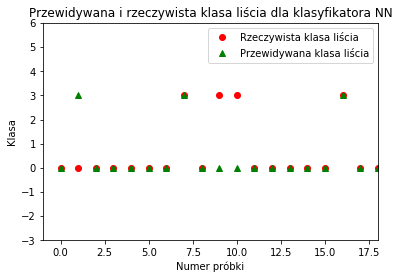

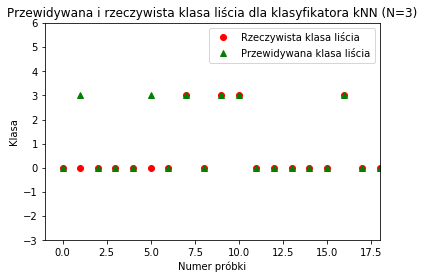

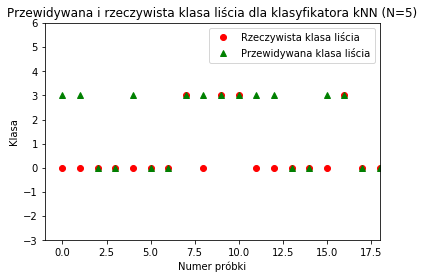

In [139]:
            #Wyświetlenie rzeczywistej klasy liścia i przewidywanej dla klasyfikatorów   
    
    #Klasyfikator NN
plt.plot(test_labels_3, 'ro', label='Rzeczywista klasa liścia')
plt.plot(NN_predic_groups, 'g^', label='Przewidywana klasa liścia')
plt.title("Przewidywana i rzeczywista klasa liścia dla klasyfikatora NN")
plt.xlabel("Numer próbki")
plt.ylabel("Klasa")
plt.legend()
plt.axis([-1, 18, -3, 6])
plt.show()

    #Klasyfikator kNN (N=3)
plt.plot(test_labels_3, 'ro', label='Rzeczywista klasa liścia')
plt.plot(kNN_3_predic_groups, 'g^', label='Przewidywana klasa liścia')
plt.title("Przewidywana i rzeczywista klasa liścia dla klasyfikatora kNN (N=3)")
plt.xlabel("Numer próbki")
plt.ylabel("Klasa")
plt.legend()
plt.axis([-1, 18, -3, 6])
plt.show()
 
    #Klasyfikator kNN (N=5)
plt.plot(test_labels_3, 'ro', label='Rzeczywista klasa liścia')
plt.plot(kNN_5_predic_groups, 'g^', label='Przewidywana klasa liścia')
plt.title("Przewidywana i rzeczywista klasa liścia dla klasyfikatora kNN (N=5)")
plt.xlabel("Numer próbki")
plt.ylabel("Klasa")
plt.legend()
plt.axis([-1, 18, -3, 6])
plt.show()

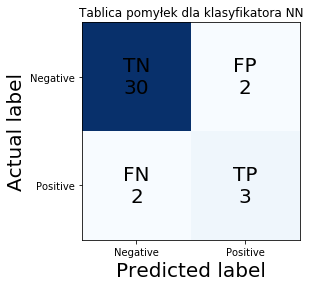

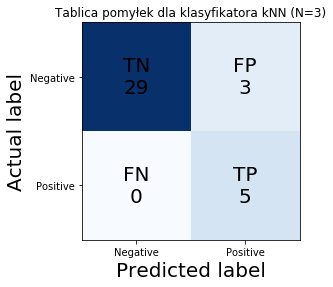

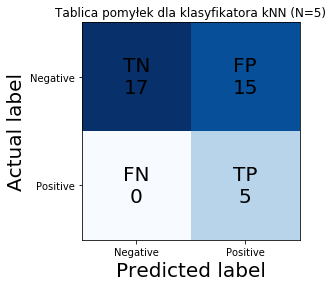

In [140]:
                     #Wyświetlenie tablicy pomyłek (confusion matrix)

    #Klasyfikator NN 
plt.figure()
cm1=confusion_matrix(test_labels_3, NN_predic_groups)
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Tablica pomyłek dla klasyfikatora NN")
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("Actual label", fontsize=20)
plt.xticks([0,1], ('Negative', 'Positive'))
plt.yticks([0,1], ('Negative', 'Positive'))
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm1[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')
       
    #Klasyfikator kNN (N=3)
plt.figure()
cm2=confusion_matrix(test_labels_3, kNN_3_predic_groups)
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Tablica pomyłek dla klasyfikatora kNN (N=3)")
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("Actual label", fontsize=20)
plt.xticks([0,1], ('Negative', 'Positive'))
plt.yticks([0,1], ('Negative', 'Positive'))
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm2[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')
        
    #Klasyfikator kNN (N=5)
plt.figure()
cm3=confusion_matrix(test_labels_3, kNN_5_predic_groups)
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Tablica pomyłek dla klasyfikatora kNN (N=5)")
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("Actual label", fontsize=20)
plt.xticks([0,1], ('Negative', 'Positive'))
plt.yticks([0,1], ('Negative', 'Positive'))
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm3[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')

In [141]:
# Porównnie dokładności i czułości klasyfikatorów

print("Dokładność klasyfikatora NN wynosi:",accuracy_score(test_labels_3, NN_predic_groups, normalize=True))
print("Dokładność klasyfikatora kNN (N=3) wynosi:",accuracy_score(test_labels_3, kNN_3_predic_groups, normalize=True))
print("Dokładność klasyfikatora kNN (N=5) wynosi:",accuracy_score(test_labels_3, kNN_5_predic_groups, normalize=True))
print('\n')
print("Czułość klasyfikatora NN wynosi:",cm1[0,0]/(cm1[0,0]+cm1[0,1]))
print("Czułość klasyfikatora kNN (N=3) wynosi:",cm2[0,0]/(cm2[0,0]+cm2[0,1]))
print("Czułość klasyfikatora kNN (N=5) wynosi:",cm3[0,0]/(cm3[0,0]+cm3[0,1]))

Dokładność klasyfikatora NN wynosi: 0.8918918918918919
Dokładność klasyfikatora kNN (N=3) wynosi: 0.918918918918919
Dokładność klasyfikatora kNN (N=5) wynosi: 0.5945945945945946


Czułość klasyfikatora NN wynosi: 0.9375
Czułość klasyfikatora kNN (N=3) wynosi: 0.90625
Czułość klasyfikatora kNN (N=5) wynosi: 0.53125


## Wnioski

Po zmodyfikowaniu klasyfikatora, tak aby umożliwiał klasyfikację 5 klas, najlepiej wypada klasyfikator kNN (N=3) --> ma on największą dokładność. 
Nie można jednoznacznie wskazać zależności pomiędzy ilością "sąsiadów", a dokładnością i czułością klasyfikatora.